# Import Packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import re
import math
import requests as re
import matplotlib.pyplot as plt
from operator import add
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical, np_utils
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [5]:
Data = pd.read_csv("CleanData.csv").drop(columns = ["Unnamed: 0","LyricsOriginal"])
Data["TrackArtist"] = Data.Track +" By "+ Data.Artist1
Data.head()

,Rank,Date,Track,Artist1,Artist2,Genre1,Genre2,LyricsClean,TrackArtist
0,1.0,1958-08-04,Poor Little Fool,Ricky Nelson,Ricky Nelson,Pop/Rock,Rock,I used to play around with hearts that hastene...,Poor Little Fool By Ricky Nelson
1,2.0,1958-08-04,Patricia,Perez Prado And His Orchestra,Perez Prado,Latin,NaN,Instrumental,Patricia By Perez Prado And His Orchestra
2,3.0,1958-08-04,Splish Splash,Bobby Darin,Bobby Darin,Pop/Rock,Blues,splish splash I was taking a bath long about a...,Splish Splash By Bobby Darin
3,4.0,1958-08-04,Hard Headed Woman,Elvis Presley With The Jordanaires,Elvis Presley,Pop/Rock,Rock,"Well a hard headed woman, A soft hearted man B...",Hard Headed Woman By Elvis Presley With The Jo...
4,5.0,1958-08-04,When,Kalin Twins,Kalin Twins,Pop/Rock,Pop,NaN,When By Kalin Twins


# Artists Performance

In [ ]:
ArtistAll = Data.Artist2[Data.Artist2!="Nan"].value_counts()[0:10]
ArtistTop10 = Data.Artist2[(Data.Artist2!="Nan") & (Data.Rank <= 10)].value_counts()[0:10]
ArtistTop3 = Data.Artist2[(Data.Artist2!="Nan") & (Data.Rank <= 3)].value_counts()[0:10]
ArtistTop1 = Data.Artist2[(Data.Artist2!="Nan") & (Data.Rank <= 1)].value_counts()[0:10]
ArtistData = pd.DataFrame({
    "Rank" : list(range(1,11)),
    "MostWeeksWithSongsAtTopCharts" : [str(i)+" : "+str(j) for j, i in zip(ArtistTop1.tolist(),pd.DataFrame(ArtistTop1).index.tolist())],
    "MostWeeksWithSongsInTop3Charts" : [str(i)+" : "+str(j) for j, i in zip(ArtistTop3.tolist(),pd.DataFrame(ArtistTop3).index.tolist())],
    "MostWeeksWithSongsInTop10Charts" : [str(i)+" : "+str(j) for j, i in zip(ArtistTop10.tolist(),pd.DataFrame(ArtistTop10).index.tolist())],
    "MostWeeksWithSongsInTop100Charts" : [str(i)+" : "+str(j) for j, i in zip(ArtistAll.tolist(),pd.DataFrame(ArtistAll).index.tolist())]
})
ArtistData.to_csv("Leaderboards/ArtistLeaderboards.csv")
ArtistData.head()

# Songs Performance

In [ ]:
SongsAll = Data.TrackArtist[Data.TrackArtist!="Nan"].value_counts()[0:10]
SongsTop10 = Data.TrackArtist[(Data.TrackArtist!="Nan") & (Data.Rank <= 10)].value_counts()[0:10]
SongsTop3 = Data.TrackArtist[(Data.TrackArtist!="Nan") & (Data.Rank <= 3)].value_counts()[0:10]
SongsTop1 = Data.TrackArtist[(Data.TrackArtist!="Nan") & (Data.Rank <= 1)].value_counts()[0:10]
SongsData = pd.DataFrame({
    "Rank" : list(range(1,11)),
    "MostWeeksAtTopCharts" : [str(i)+" : "+str(j) for j, i in zip(SongsTop1.tolist(),pd.DataFrame(SongsTop1).index.tolist())],
    "MostWeeksInTop3Charts" : [str(i)+" : "+str(j) for j, i in zip(SongsTop3.tolist(),pd.DataFrame(SongsTop3).index.tolist())],
    "MostWeeksInTop10Charts" : [str(i)+" : "+str(j) for j, i in zip(SongsTop10.tolist(),pd.DataFrame(SongsTop10).index.tolist())],
    "MostWeeksInTop100Charts" : [str(i)+" : "+str(j) for j, i in zip(SongsAll.tolist(),pd.DataFrame(SongsAll).index.tolist())]
})
SongsData.to_csv("Leaderboards/SongLeaderboards.csv")
SongsData.head()

# Genre Data

In [ ]:
GenreData = pd.DataFrame({"Date" : Data.Date.unique()})
GenreData["Blues"] = [Data[(Data.Date == i) & (Data.Genre2=="Blues")].shape[0] for i in GenreData.Date]
GenreData["Rock"] = [Data[(Data.Date == i) & (Data.Genre2=="Rock")].shape[0] for i in GenreData.Date]
GenreData["Pop"] = [Data[(Data.Date == i) & (Data.Genre2=="Pop")].shape[0] for i in GenreData.Date]
GenreData["HipHop"] = [Data[(Data.Date == i) & (Data.Genre2=="HipHop")].shape[0] for i in GenreData.Date]
GenreData["R&B"] = [Data[(Data.Date == i) & (Data.Genre2=="R&B")].shape[0] for i in GenreData.Date]
GenreData["Country"] = [Data[(Data.Date == i) & (Data.Genre2=="Country")].shape[0] for i in GenreData.Date]
GenreData["Folk"] = [Data[(Data.Date == i) & (Data.Genre2=="Folk")].shape[0] for i in GenreData.Date]
GenreData["Reggae"] = [Data[(Data.Date == i) & (Data.Genre2=="Reggae")].shape[0] for i in GenreData.Date]
GenreData["Electro"] = [Data[(Data.Date == i) & (Data.Genre2=="Electro")].shape[0] for i in GenreData.Date]
GenreData["Religous"] = [Data[(Data.Date == i) & (Data.Genre2=="Religous")].shape[0] for i in GenreData.Date]
GenreData.head()

# Genre Output

In [ ]:
GenreData.to_csv("GenreData.csv")

# Build Unique Song Dataset For Neural Network

In [6]:
UniqueData = Data[["TrackArtist","Artist2","Genre1","Genre2","LyricsClean"]].drop_duplicates()
UniqueData = UniqueData[UniqueData.TrackArtist.isna() == False]
UniqueData["MaxRank"] = [max(Data.Rank[Data.TrackArtist == i]) for i in UniqueData.TrackArtist]
UniqueData.head()

,TrackArtist,Artist2,Genre1,Genre2,LyricsClean,MaxRank
0,Poor Little Fool By Ricky Nelson,Ricky Nelson,Pop/Rock,Rock,I used to play around with hearts that hastene...,71.0
1,Patricia By Perez Prado And His Orchestra,Perez Prado,Latin,NaN,Instrumental,85.0
2,Splish Splash By Bobby Darin,Bobby Darin,Pop/Rock,Blues,splish splash I was taking a bath long about a...,3.0
3,Hard Headed Woman By Elvis Presley With The Jo...,Elvis Presley,Pop/Rock,Rock,"Well a hard headed woman, A soft hearted man B...",94.0
4,When By Kalin Twins,Kalin Twins,Pop/Rock,Pop,NaN,64.0


(array([  790.,   893.,   957.,  1039.,  1516.,  1693.,  2346.,  3986.,
         7410., 16860.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

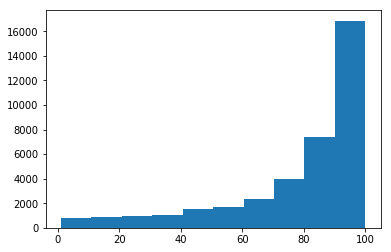

In [7]:
plt.hist(UniqueData.MaxRank)

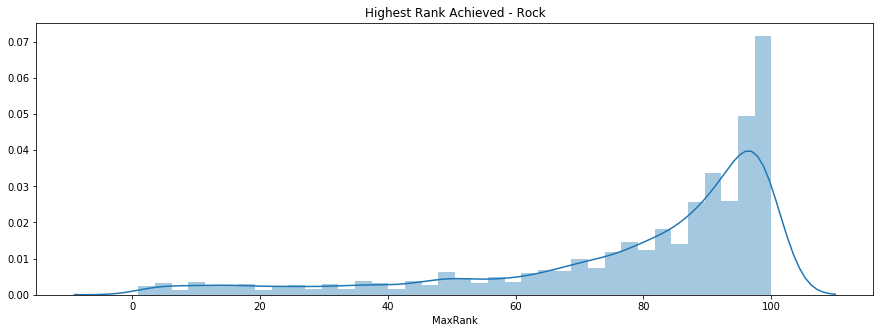

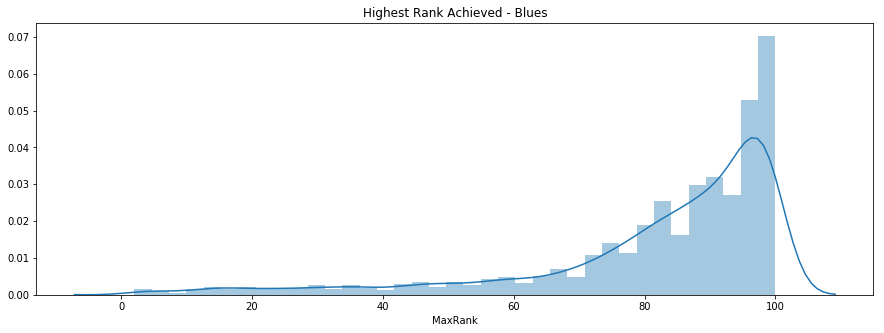

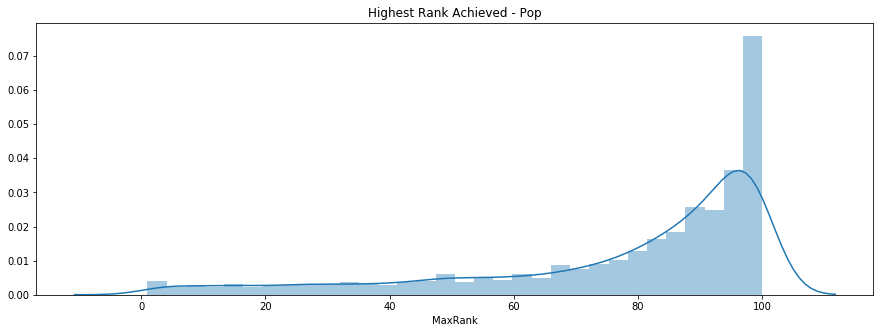

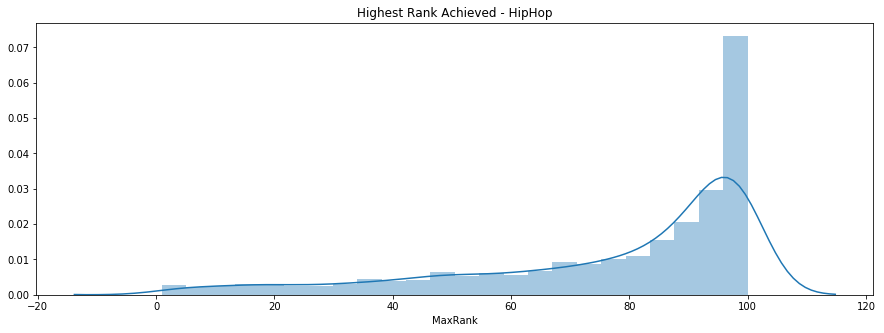

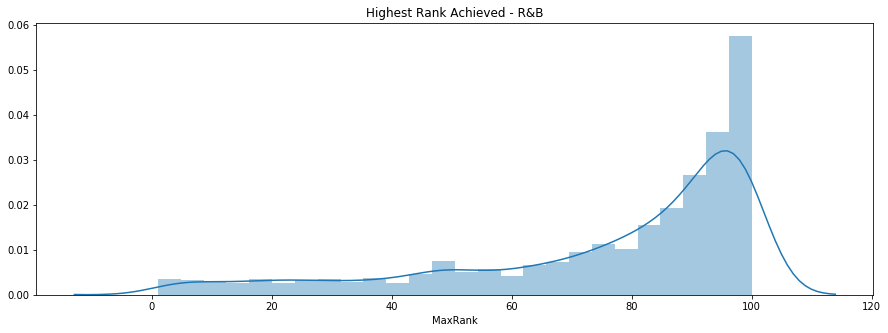

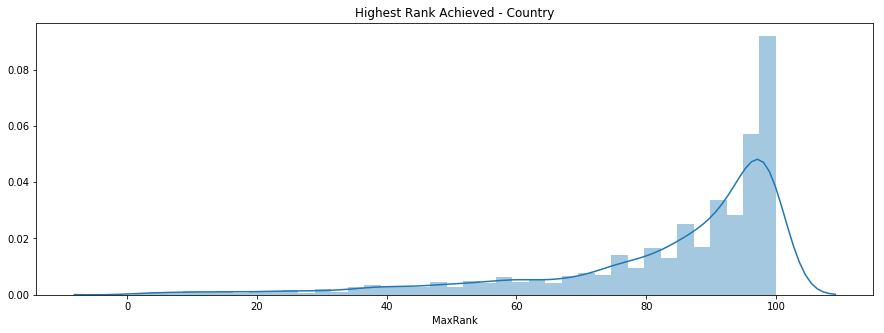

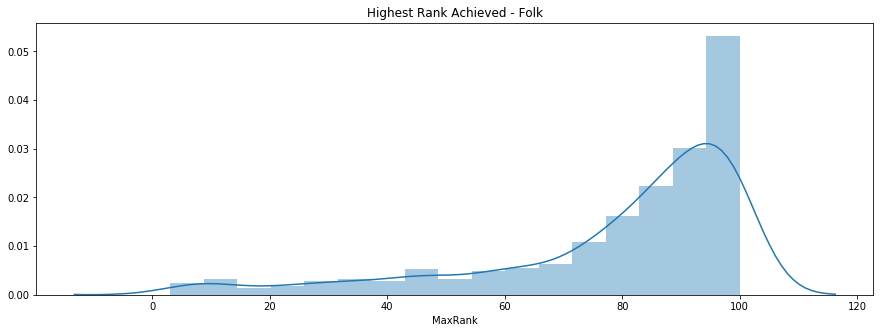

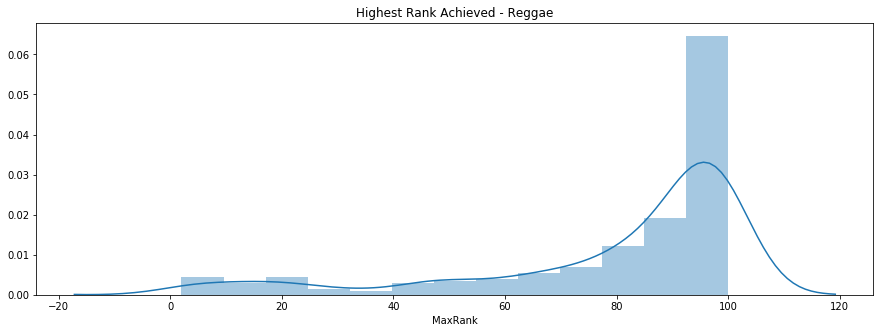

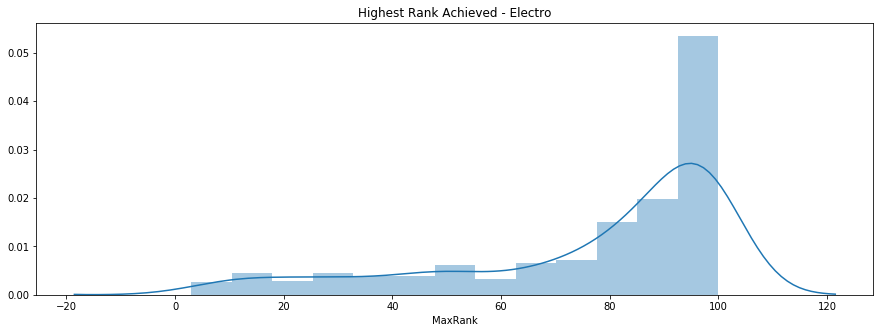

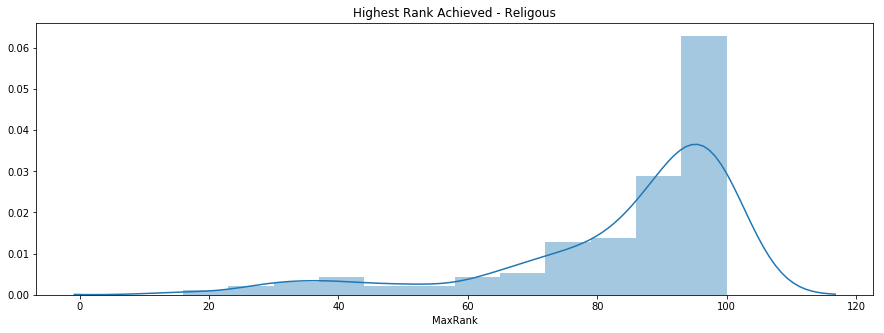

In [8]:
for i in UniqueData.Genre2.unique():
    if pd.notna(i):
        fig, axs = plt.subplots(ncols=1, figsize=(15,5))
        sns.distplot(UniqueData.MaxRank[UniqueData.Genre2 == i], ax = axs).set_title("Highest Rank Achieved - {}".format(i))

# Split Training, Test, X & Y

In [9]:
UniqueData = UniqueData.dropna(subset = ["LyricsClean"])

In [10]:
UniqueData.to_csv("temp.csv")

In [11]:
UniqueData = pd.read_csv("temp.csv").drop(columns = "Unnamed: 0")
UniqueData.head()

,TrackArtist,Artist2,Genre1,Genre2,LyricsClean,MaxRank
0,Poor Little Fool By Ricky Nelson,Ricky Nelson,Pop/Rock,Rock,I used to play around with hearts that hastene...,71.0
1,Patricia By Perez Prado And His Orchestra,Perez Prado,Latin,NaN,Instrumental,85.0
2,Splish Splash By Bobby Darin,Bobby Darin,Pop/Rock,Blues,splish splash I was taking a bath long about a...,3.0
3,Hard Headed Woman By Elvis Presley With The Jo...,Elvis Presley,Pop/Rock,Rock,"Well a hard headed woman, A soft hearted man B...",94.0
4,Rebel-'rouser By Duane Eddy His Twangy Guitar ...,Duane Eddy,Pop/Rock,Rock,Instrumental,52.0


In [12]:
print("Numebr Of Nas For Genre1",len(UniqueData.Genre1)-UniqueData.Genre1.count())
UniqueData.Genre1.value_counts()

Numebr Of Nas For Genre1 343


Pop/Rock         10844
R&B               5073
Country           2184
Rap               1918
Vocal              829
Electronic         494
Jazz               227
Latin              198
Blues              180
Folk               171
Easy               144
Reggae             129
Stage               75
Religious           61
Comedy/Spoken       39
International       27
Children            18
Classical           12
New                  8
Avant                4
Holiday              1
Name: Genre1, dtype: int64

In [13]:
print("Numebr Of Nas For Genre2",len(UniqueData.Genre2)-UniqueData.Genre2.count())
UniqueData.Genre2.value_counts()

Numebr Of Nas For Genre2 4039


Rock        5239
Pop         4090
R&B         3011
Country     2221
HipHop      1871
Blues       1678
Folk         339
Electro      249
Reggae       168
Religous      74
Name: Genre2, dtype: int64

In [14]:
UniqueData = UniqueData.dropna(subset=["Genre1"])
UniqueData = UniqueData[UniqueData.Genre1.isin(["Pop/Rock"
                                               ,"R&B"       
                                               ,"Country"   
                                               ,"Rap"       
                                               ,"Vocal"     
                                               ,"Electronic"
                                               ,"Jazz"      
                                               ,"Latin"     
                                               ,"Blues"     
                                               ,"Folk"      
                                               ,"Easy"      
                                               ,"Reggae"])]
UniqueData.loc[UniqueData.Genre1=="Jazz"] = "Blues"
UniqueData.loc[UniqueData.Genre1=="Vocal"] = "Folk"
XTrain, XTest, YTrain, YTest = train_test_split(UniqueData["LyricsClean"], UniqueData['Genre1'])

# Bag Of Words

In [15]:
Vectorizer = TfidfVectorizer()
Vectorizer.fit(XTrain)
XTrain = Vectorizer.transform(XTrain)
XTest  = Vectorizer.transform(XTest)

# Baseline Logistic Regression Model

In [16]:
Classifier = LogisticRegression(n_jobs=-1)
Classifier.fit(XTrain, YTrain)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
UniqueData.Genre1.unique()

array(['Pop/Rock', 'Latin', 'R&B', 'Country', 'Blues', 'Folk', 'Easy',
       'Reggae', 'Electronic', 'Rap'], dtype=object)

In [18]:
print(f1_score(YTrain,Classifier.predict(XTrain), average="micro"))
print(f1_score(YTest,Classifier.predict(XTest), average="micro"))
confusion_matrix(YTest,Classifier.predict(XTest))

0.6837968201036146
0.6286173633440515


array([[  54,    0,    0,    0,    0,    0,   35,    3,    2,    0],
       [   1,   42,    0,    0,    0,    0,  471,   46,    5,    0],
       [   0,    0,    1,    0,    0,    0,   33,    3,    0,    0],
       [   0,    3,    0,    0,    0,    0,  105,   18,    1,    0],
       [   0,    0,    0,    0,  215,    0,   32,    7,    0,    0],
       [   0,    1,    0,    0,    0,    6,   35,    4,    0,    0],
       [   0,    8,    0,    0,    0,    3, 2489,  196,   11,    1],
       [   0,    4,    1,    0,    0,    0,  768,  451,   23,    0],
       [   0,    0,    0,    0,    0,    0,  181,   48,  260,    0],
       [   0,    0,    0,    0,    0,    0,   20,    5,    5,    1]])

# Baseline Deep Learning Model - Sequential Neural Network

In [19]:
Encoder = LabelEncoder()
Encoder.fit(YTrain)
YTrainNum = Encoder.transform(YTrain)
YTrainDummy = np_utils.to_categorical(YTrainNum)
YTestNum = Encoder.transform(YTest)
YTestDummy = np_utils.to_categorical(YTestNum)

In [20]:
InputDim = XTrain.shape[1]
Model = Sequential()
Model.add(layers.Dense(30, input_dim=InputDim, activation='relu'))
Model.add(layers.Dropout(rate = 0.4))
Model.add(layers.Dense(20, activation='relu'))
Model.add(layers.Dropout(rate = 0.4))
Model.add(layers.Dense(10, activation='softmax'))

Model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=["acc"])
Model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                1148790   
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 1,149,620
Trainable params: 1,149,620
Non-trainable params: 0
___________

In [21]:
Model.fit(XTrain, YTrainDummy,
          epochs=25,
          validation_data=(XTest, YTestDummy),
          batch_size=15,
          verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 16793 samples, validate on 5598 samples
Epoch 1/25
16793/16793 [==============================] - 23s 1ms/step - loss: 1.4660 - acc: 0.5012 - val_loss: 1.2173 - val_acc: 0.5638
Epoch 2/25
16793/16793 [==============================] - 15s 889us/step - loss: 1.1931 - acc: 0.5832 - val_loss: 1.1122 - val_acc: 0.6268
Epoch 3/25
16793/16793 [==============================] - 15s 890us/step - loss: 1.0410 - acc: 0.6409 - val_loss: 1.0588 - val_acc: 0.6426
Epoch 4/25
16793/16793 [==============================] - 15s 888us/step - loss: 0.9165 - acc: 0.6911 - val_loss: 1.0499 - val_acc: 0.6588
Epoch 5/25
16793/16793 [==============================] - 15s 884us/step - loss: 0.8128 - acc: 0.7294 - val_loss: 1.0777 - val_acc: 0.6708
Epoch 6/25
16793/16793 [==============================] - 15s 883us/step - loss: 0.7380 - acc: 0.7563 - val_loss: 1.0984 - val_acc: 0.6801
Epoch 7/25
16793/16793 [==============================] - 15s 885us/ste

In [22]:
print(f1_score(YTrainNum,Model.predict_classes(XTrain), average="micro"))
print(f1_score(YTestNum,Model.predict_classes(XTest), average="micro"))
confusion_matrix(YTestNum,Model.predict_classes(XTest))

0.9035312332519502
0.6961414790996785


array([[  58,    1,    0,    0,    0,    0,   12,   21,    2,    0],
       [   1,  250,    0,    1,    0,    1,  222,   83,    7,    0],
       [   0,    3,    0,    2,    0,    0,   24,    7,    1,    0],
       [   0,    9,    0,   45,    0,    0,   45,   22,    6,    0],
       [   0,    2,    0,    3,  224,    0,   21,    3,    1,    0],
       [   0,    4,    0,    0,    0,   16,   17,    9,    0,    0],
       [   0,  118,    0,   16,    5,    1, 2191,  332,   45,    0],
       [   1,   46,    0,   12,    2,    0,  379,  768,   39,    0],
       [   0,    7,    0,    1,    0,    0,   89,   47,  345,    0],
       [   0,    5,    0,    1,    0,    0,    7,   12,    6,    0]])

# Word Embedding Neural Network

In [23]:
XTrain, XTest, YTrain, YTest = train_test_split(UniqueData["LyricsClean"], UniqueData['Genre1'])

In [24]:
Encoder = LabelEncoder()
Encoder.fit(YTrain)
YTrainNum = Encoder.transform(YTrain)
YTrainDummy = np_utils.to_categorical(YTrainNum)
YTestNum = Encoder.transform(YTest)
YTestDummy = np_utils.to_categorical(YTestNum)

In [25]:
TokenModel = Tokenizer(num_words=5000)
TokenModel.fit_on_texts(XTrain.tolist())
XTrain = TokenModel.texts_to_sequences(XTrain.tolist())
#XTrain = TokenModel.texts_to_matrix(XTrain, mode='tfidf')
XTest = TokenModel.texts_to_sequences(XTest.tolist())
#XTest = TokenModel.texts_to_matrix(XTest, mode='tfidf')

In [26]:
XTrain = pad_sequences(XTrain, padding='post', maxlen=500)
XTest = pad_sequences(XTest, padding='post', maxlen=500)

In [27]:
InputDim = XTrain.shape[1]
Model = Sequential()
Model.add(layers.Embedding(input_dim=5000,
                           output_dim=200,
                           input_length=500))
Model.add(layers.GlobalMaxPooling1D())
#Model.add(layers.Flatten())
Model.add(layers.Dense(50, activation='relu'))
#Model.add(layers.SpatialDropout1D(0.2))
#Model.add(layers.GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
#Model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#Model.add(layers.Dense(40, activation='relu'))
#Model.add(layers.Dropout(rate = 0.3))
Model.add(layers.Dense(10, activation='softmax'))

Model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=["acc"])
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 200)          1000000   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 1,010,560
Trainable params: 1,010,560
Non-trainable params: 0
_________________________________________________________________


In [28]:
Model.fit(XTrain, 
          YTrainDummy,
          epochs=25,
          validation_data=(XTest, YTestDummy),
          batch_size=15,
          verbose=1)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 16793 samples, validate on 5598 samples
Epoch 1/25
16793/16793 [==============================] - 16s 932us/step - loss: 1.2909 - acc: 0.5582 - val_loss: 1.1901 - val_acc: 0.6083
Epoch 2/25
16793/16793 [==============================] - 15s 901us/step - loss: 1.0978 - acc: 0.6319 - val_loss: 1.0858 - val_acc: 0.6445
Epoch 3/25
16793/16793 [==============================] - 15s 887us/step - loss: 0.9577 - acc: 0.6858 - val_loss: 1.0524 - val_acc: 0.6542
Epoch 4/25
16793/16793 [==============================] - 15s 896us/step - loss: 0.8255 - acc: 0.7364 - val_loss: 1.0444 - val_acc: 0.6729
Epoch 5/25
16793/16793 [==============================] - 15s 895us/step - loss: 0.7118 - acc: 0.7726 - val_loss: 1.0589 - val_acc: 0.6735
Epoch 6/25
16793/16793 [==============================] - 15s 895us/step - loss: 0.6156 - acc: 0.8059 - val_loss: 1.0676 - val_acc: 0.6793
Epoch 7/25
16793/16793 [===============

In [29]:
print(f1_score(YTrainNum,Model.predict_classes(XTrain), average="micro"))
print(f1_score(YTestNum,Model.predict_classes(XTest), average="micro"))
print("😊")
confusion_matrix(YTestNum,Model.predict_classes(XTest))

0.9228249866015602
0.7095391211146839
😊


array([[  77,    2,    0,    0,    0,    0,   16,   12,    0,    0],
       [   6,  259,    1,    6,    1,    0,  196,   80,    4,    4],
       [   1,    1,   14,    0,    0,    0,   15,   10,    0,    0],
       [   0,    7,    0,   45,    0,    0,   39,   17,    0,    1],
       [   0,    3,    0,    0,  222,    1,   12,   13,    1,    0],
       [   0,    2,    0,    0,    0,   28,   11,   11,    2,    0],
       [   7,  134,    0,   11,    9,    7, 2183,  320,   31,   23],
       [   2,   46,    2,   11,    3,    3,  356,  788,   36,    5],
       [   1,    4,    0,    3,    1,    0,   71,   48,  333,    4],
       [   0,    1,    0,    0,    0,    0,    8,    3,    1,   23]])

# LTSTM Neural Network

In [30]:
XTrain, XTest, YTrain, YTest = train_test_split(UniqueData["LyricsClean"], UniqueData['Genre1'])

In [31]:
Encoder = LabelEncoder()
Encoder.fit(YTrain)
YTrainNum = Encoder.transform(YTrain)
YTrainDummy = np_utils.to_categorical(YTrainNum)
YTestNum = Encoder.transform(YTest)
YTestDummy = np_utils.to_categorical(YTestNum)

In [32]:
TokenModel = Tokenizer(num_words=5000)
TokenModel.fit_on_texts(XTrain.tolist())
XTrain = TokenModel.texts_to_sequences(XTrain.tolist())
#XTrain = TokenModel.texts_to_matrix(XTrain, mode='tfidf')
XTest = TokenModel.texts_to_sequences(XTest.tolist())
#XTest = TokenModel.texts_to_matrix(XTest, mode='tfidf')

In [33]:
XTrain = pad_sequences(XTrain, padding='post', maxlen=500)
XTest = pad_sequences(XTest, padding='post', maxlen=500)

In [42]:
InputDim = XTrain.shape[1]
Model = Sequential()
Model.add(layers.Embedding(input_dim=5000,
                           output_dim=100,
                           input_length=500))
#Model.add(layers.GlobalMaxPooling1D())
#Model.add(layers.Flatten())
#Model.add(layers.Dense(50, activation='relu'))
#Model.add(layers.SpatialDropout1D(0.2))
#Model.add(layers.GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
Model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#Model.add(layers.Dense(40, activation='relu'))
#Model.add(layers.Dropout(rate = 0.3))
Model.add(layers.Dense(10, activation='softmax'))

Model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=["acc"])
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 581,410
Trainable params: 581,410
Non-trainable params: 0
_________________________________________________________________


In [43]:
Model.fit(XTrain, 
          YTrainDummy,
          epochs=15,
          validation_data=(XTest, YTestDummy),
          batch_size=15,
          verbose=1)

Train on 16793 samples, validate on 5598 samples
Epoch 1/15
16793/16793 [==============================] - 465s 28ms/step - loss: 1.4750 - acc: 0.5104 - val_loss: 1.4624 - val_acc: 0.5093
Epoch 2/15
13290/16793 [======================>.......] - ETA: 1:31 - loss: 1.4301 - acc: 0.5185

KeyboardInterrupt: 

In [ ]:
print(f1_score(YTrainNum,Model.predict_classes(XTrain), average="micro"))
print(f1_score(YTestNum,Model.predict_classes(XTest), average="micro"))
print("😊")
confusion_matrix(YTestNum,Model.predict_classes(XTest))